# Mixture of Bernoulli Distributions

## Background

**E-step**:  
Compute the posterior probability distribution considering the _old_ parameters:

$$
    p(z_{\hat k} = 1 | {\bf x}) = \frac{\left[\pi_{\hat k}p({\bf x}|\mu_{\hat k})\right]^{z_{\hat k}}}{\sum_{k=1}^K \pi_kp({\bf x}|\mu_k)}
$$

The expectation of $z_{\hat k}$ is given by

$$
    \mathbb{E}[z_k] = \frac{\pi_{\hat k}p({\bf x}|\mu_{\hat k})}{\sum_{k=1}^K \pi_kp({\bf x}|\mu_k)} =: \gamma(z_k)
$$

**M-step**:  
Maximize the expectation of the complete-data log-likelihood over the latent posterior distribution $Q$ with respect to the parameters $\boldsymbol\pi$, $\boldsymbol \mu$

$$
    Q = \sum_{n=1}^N\sum_{k=1}^K \gamma(z_{nk})\left[\log \pi_k + \sum_{d=1}^D \left[{\bf x}_{n,d} \log \mu_{k,d} + (1 - {\bf x}_{n,d}) \log(1 - \mu_{k,d})\right] \right]
$$

---

**Note**: In maximizing $Q$ w.r.t. $\mu$ and $\pi$ we are ommiting the effect of the derivative over $\gamma$ –which depends on $\mu$ and $\pi$– since $\gamma$ considers only its _old_ values, which are given constants.

---

Maximizing $Q$ w.r.t. $\pi$ and $\mu$ we arrive at the equations:

$$
\mu_k = \bar{\bf x}_k
$$

$$
    \pi_k = \frac{N_k}{N}
$$

Where

* $N_k = \sum_{n=1}^N \gamma(z_{nk})$
* $\bar{\bf x}_k = \frac{1}{N_k}\sum{n=1}^N \gamma(z_{nk})x_n$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, choice
from tensorflow.keras.datasets import mnist

## The Bernoulli Mixture Model on Digits

In the following example, we use a bernoilli mixture to model handwritten digits.

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

We fit a dataset of $N=600$ digits, compresing the digits `2`, `3`, and `4`, with a mixture of $K=3$ Bernoulli distributions by running 10 iterations of the EM algorithm.

In [50]:
target_ix = (y_train == 2) | (y_train == 3) | (y_train == 4)
X, y = X_train[target_ix], y_train[target_ix]

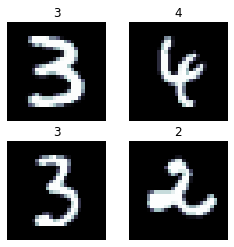

In [49]:
seed(314)
show_ix = choice(np.arange(len(y)), size=4, replace=False)
fig, ax = plt.subplots(2, 2, figsize=(4,4))
ax = ax.ravel()

for axi, ix in zip(ax, show_ix):
    axi.imshow(X[ix], cmap="bone")
    axi.set_title(y[ix])
    axi.axis("off")